In [74]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
import csv

csvpath = os.path.join('data_export','revenue_district.csv')
expenditure_data = pd.read_csv(csvpath)



# Create a summar table for public school zipcodes

In [30]:
# load the excel into pandas
df_enrollment = pd.read_excel('dataset/C11_FY2019_HS Graduates 2017_Enrolled in College in 16 Mos_Redacted (2).xlsx')

In [31]:
# setting up the correct column names
# isolate the datapoints that we are interested in
all_school = df_enrollment.iloc[:,0:7].iloc[1:,]
# set new vlaues for columns
all_school.columns = all_school.iloc[0]
# remove the duplicate column names and reset the index
all_school = all_school.loc[2:,:].reset_index(drop = True)

In [32]:
# create df for aggregate information on all the schoool districts
school_all = all_school.loc[all_school['School Code'] == 'ALL']
# create df for the individual school codes
school_district = all_school.loc[all_school['School Code'] != 'ALL']
school_district

1,School Year,School District Code,School District Name,School Code,School Name,Total High School Graduates,Number of High School Graduates Enrolled in Postsecondary Institution
0,2017,601,Appling County,103,Appling County High School,198,118
2,2017,602,Atkinson County,103,Atkinson County High School,97,60
4,2017,603,Bacon County,302,Bacon County High School,118,66
6,2017,604,Baker County,105,Baker County K12 School,18,TFS
8,2017,605,Baldwin County,189,Baldwin High School,271,171
...,...,...,...,...,...,...,...
627,2017,891,Department of Juvenile Justice,298,Augusta Youth Development Campus,TFS,TFS
628,2017,891,Department of Juvenile Justice,598,Macon Youth Development Campus,TFS,TFS
629,2017,891,Department of Juvenile Justice,898,Eastman Youth Development Campus,TFS,TFS
630,2017,891,Department of Juvenile Justice,4199,Millegeville ITU,TFS,TFS


In [33]:
# identify the performance metrics that we want to use for analysis
performance_metrics = school_all[['School District Code','Total High School Graduates','Number of High School Graduates Enrolled in Postsecondary Institution']]
performance_metrics

1,School District Code,Total High School Graduates,Number of High School Graduates Enrolled in Postsecondary Institution
1,601,198,118
3,602,97,60
5,603,118,66
7,604,18,TFS
9,605,271,171
...,...,...,...
621,793,167,114
623,7991893,TFS,TFS
625,7991895,TFS,TFS
632,891,20,10


In [34]:
#create a backup 
school_all.to_csv('data_export/school_all.csv',index=False)
df = school_all.copy()


In [35]:
# reorganize the dataframe for the columns
df.columns = ['School Year', 'School District Code', 'School District Name',
       'School Code', 'School Name', 'Graduates',
       'Postsecondary Institution']

df

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution
1,2017,601,Appling County,ALL,All Schools,198,118
3,2017,602,Atkinson County,ALL,All Schools,97,60
5,2017,603,Bacon County,ALL,All Schools,118,66
7,2017,604,Baker County,ALL,All Schools,18,TFS
9,2017,605,Baldwin County,ALL,All Schools,271,171
...,...,...,...,...,...,...,...
621,2017,793,Vidalia City,ALL,All Schools,167,114
623,2017,7991893,State Schools- Atlanta Area School for the Deaf,ALL,All Schools,TFS,TFS
625,2017,7991895,State Schools- Georgia School for the Deaf,ALL,All Schools,TFS,TFS
632,2017,891,Department of Juvenile Justice,ALL,All Schools,20,10


In [36]:
# drop all the rows where there are anhy value "TFS" in the cells
school_no_TFS = df.replace('TFS', np.nan).dropna()
school_no_TFS

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution
1,2017,601,Appling County,ALL,All Schools,198.0,118.0
3,2017,602,Atkinson County,ALL,All Schools,97.0,60.0
5,2017,603,Bacon County,ALL,All Schools,118.0,66.0
9,2017,605,Baldwin County,ALL,All Schools,271.0,171.0
11,2017,606,Banks County,ALL,All Schools,209.0,108.0
...,...,...,...,...,...,...,...
617,2017,791,Trion City,ALL,All Schools,88.0,69.0
619,2017,792,Valdosta City,ALL,All Schools,374.0,247.0
621,2017,793,Vidalia City,ALL,All Schools,167.0,114.0
632,2017,891,Department of Juvenile Justice,ALL,All Schools,20.0,10.0


In [37]:
# reset the index for the dataframe
school_no_TFS = school_no_TFS.reset_index(drop=True)
# remove the aggregate School District Code data at the end of the dataset
school_no_TFS = school_no_TFS.iloc[:185]
school_no_TFS

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution
0,2017,601,Appling County,ALL,All Schools,198.0,118.0
1,2017,602,Atkinson County,ALL,All Schools,97.0,60.0
2,2017,603,Bacon County,ALL,All Schools,118.0,66.0
3,2017,605,Baldwin County,ALL,All Schools,271.0,171.0
4,2017,606,Banks County,ALL,All Schools,209.0,108.0
...,...,...,...,...,...,...,...
180,2017,789,Thomasville City,ALL,All Schools,155.0,123.0
181,2017,791,Trion City,ALL,All Schools,88.0,69.0
182,2017,792,Valdosta City,ALL,All Schools,374.0,247.0
183,2017,793,Vidalia City,ALL,All Schools,167.0,114.0


In [38]:
# create a column for the percentage of students that went to college after graduation
percent = (school_no_TFS['Postsecondary Institution'] / school_no_TFS['Graduates']*100).round(2)
school_no_TFS['Percent'] = percent
school_no_TFS

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
0,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.60
1,2017,602,Atkinson County,ALL,All Schools,97.0,60.0,61.86
2,2017,603,Bacon County,ALL,All Schools,118.0,66.0,55.93
3,2017,605,Baldwin County,ALL,All Schools,271.0,171.0,63.10
4,2017,606,Banks County,ALL,All Schools,209.0,108.0,51.67
...,...,...,...,...,...,...,...,...
180,2017,789,Thomasville City,ALL,All Schools,155.0,123.0,79.35
181,2017,791,Trion City,ALL,All Schools,88.0,69.0,78.41
182,2017,792,Valdosta City,ALL,All Schools,374.0,247.0,66.04
183,2017,793,Vidalia City,ALL,All Schools,167.0,114.0,68.26


<AxesSubplot:xlabel='School District Code'>

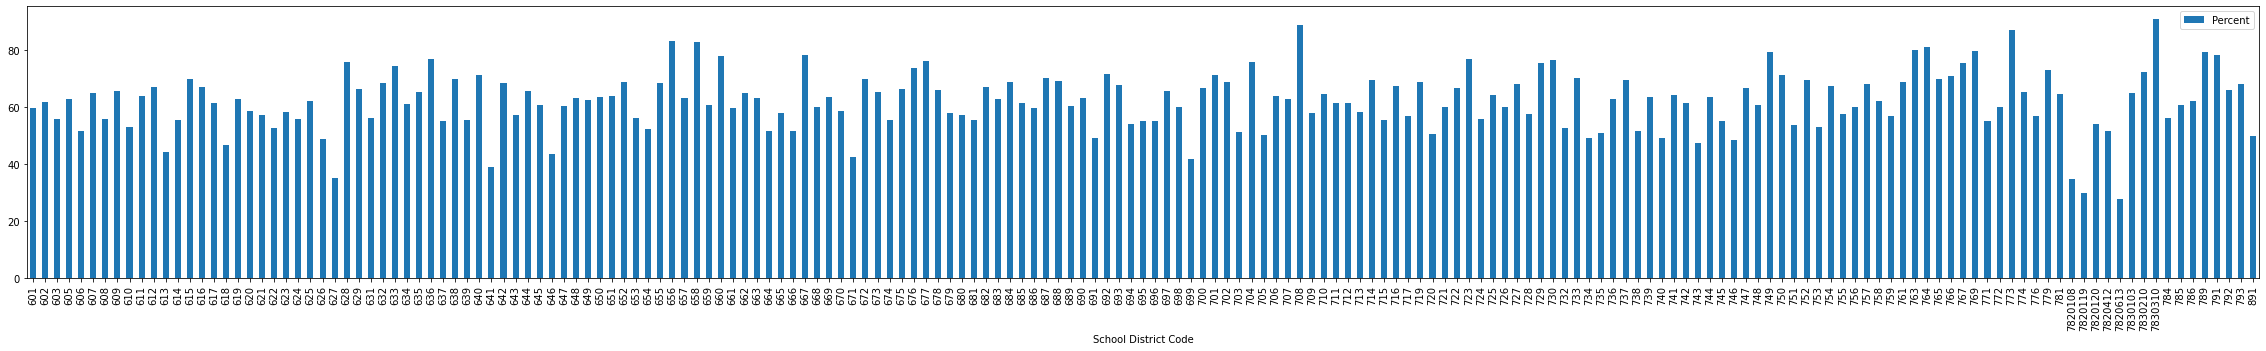

In [39]:
# generate the bar graph of college enrollment percentage per county
school_no_TFS.plot.bar(x='School District Code', y='Percent', figsize = (40,5))

In [40]:
school_no_TFS = school_no_TFS.loc[school_no_TFS['School District Code']<1000]

In [41]:
school_sorted = school_no_TFS.sort_values('Percent', ascending = False)

In [42]:
school_sorted.head()


,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
105,2017,708,Oconee County,ALL,All Schools,553.0,491.0,88.79
164,2017,773,Decatur City,ALL,All Schools,254.0,221.0,87.01
53,2017,656,Fayette County,ALL,All Schools,1575.0,1312.0,83.30
55,2017,658,Forsyth County,ALL,All Schools,3020.0,2502.0,82.85
157,2017,764,Buford City,ALL,All Schools,269.0,218.0,81.04


In [43]:
school_sorted.sort_values('Percent').head()

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
25,2017,627,Chattooga County,ALL,All Schools,215.0,76.0,35.35
38,2017,641,Dade County,ALL,All Schools,125.0,49.0,39.20
96,2017,699,Meriwether County,ALL,All Schools,155.0,65.0,41.94
68,2017,671,Haralson County,ALL,All Schools,223.0,95.0,42.60
43,2017,646,Dooly County,ALL,All Schools,92.0,40.0,43.48


In [44]:
# Create checkpoint for cleaned performance metics dataframe
school_clean = school_no_TFS.copy()

In [45]:
# Export dataframe to csv
school_clean = school_no_TFS
school_clean.to_csv('data_export/school_clean.csv',index=False)

In [46]:
import random
random_list = []
for index in range(school_sorted['School District Code'].count()):
    random_list.append(random.randrange(school_sorted['School District Code'].count()))
    
index_list = random_list[:100]

In [47]:
rand_school_data = school_sorted.iloc[index_list]
rand_school_data

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
62,2017,665,Grady County,ALL,All Schools,253.0,147.0,58.10
162,2017,771,Commerce City,ALL,All Schools,85.0,47.0,55.29
115,2017,719,Rabun County,ALL,All Schools,132.0,91.0,68.94
17,2017,619,Calhoun County,ALL,All Schools,43.0,27.0,62.79
146,2017,751,Wayne County,ALL,All Schools,328.0,176.0,53.66
...,...,...,...,...,...,...,...,...
43,2017,646,Dooly County,ALL,All Schools,92.0,40.0,43.48
181,2017,791,Trion City,ALL,All Schools,88.0,69.0,78.41
115,2017,719,Rabun County,ALL,All Schools,132.0,91.0,68.94
82,2017,685,Lamar County,ALL,All Schools,159.0,98.0,61.64


In [51]:
expenditure_data

,Unnamed: 0,SCHOOL_YEAR,School District Code,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,Revenues/Expenditures,Description,REV_EXP_VALUE,Dollars per FTE
0,17,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Debt Services,0.00,0.00
1,18,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,General Administration,839011.19,240.89
2,19,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Instruction,21602137.39,6202.16
3,20,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Instructional Support,1405654.54,403.58
4,21,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Maintenance and Operations,2388308.23,685.70
...,...,...,...,...,...,...,...,...,...,...
28583,28600,2017-18,759,Worth County,0196,Worth County Primary School,K-12 Expenditures,Pupil Services,308906.85,432.64
28584,28601,2017-18,759,Worth County,0196,Worth County Primary School,K-12 Expenditures,Renovation and Capital Projects,0.00,0.00
28585,28602,2017-18,759,Worth County,0196,Worth County Primary School,K-12 Expenditures,School Administration,403012.06,564.44
28586,28603,2017-18,759,Worth County,0196,Worth County Primary School,K-12 Expenditures,School food Services,0.00,0.00


In [54]:
expenditure_data
clean_expe_df = expenditure_data.loc[(expenditure_data["SCHOOL_NAME"] == "All Column Values")]
clean_expe_df1 = clean_expe_df.loc[(expenditure_data["Revenues/Expenditures"] == "K-12 Expenditures")]
clean_expe_df1

,Unnamed: 0,SCHOOL_YEAR,School District Code,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,Revenues/Expenditures,Description,REV_EXP_VALUE,Dollars per FTE
0,17,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Debt Services,0.00,0.00
1,18,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,General Administration,839011.19,240.89
2,19,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Instruction,21602137.39,6202.16
3,20,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Instructional Support,1405654.54,403.58
4,21,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Maintenance and Operations,2388308.23,685.70
...,...,...,...,...,...,...,...,...,...,...
28522,28539,2017-18,759,Worth County,ALL,All Column Values,K-12 Expenditures,Pupil Services,2023521.56,654.23
28523,28540,2017-18,759,Worth County,ALL,All Column Values,K-12 Expenditures,Renovation and Capital Projects,0.00,0.00
28524,28541,2017-18,759,Worth County,ALL,All Column Values,K-12 Expenditures,School Administration,2003257.28,647.67
28525,28542,2017-18,759,Worth County,ALL,All Column Values,K-12 Expenditures,School food Services,23149.06,7.48


In [57]:
deletecolumns = ["School Year", "School District Name", "School Code", "School Name"]
rand_school_data_df1 = rand_school_data.drop(deletecolumns, 1)
rand_school_data_df1

,School District Code,Graduates,Postsecondary Institution,Percent
62,665,253.0,147.0,58.10
162,771,85.0,47.0,55.29
115,719,132.0,91.0,68.94
17,619,43.0,27.0,62.79
146,751,328.0,176.0,53.66
...,...,...,...,...
43,646,92.0,40.0,43.48
181,791,88.0,69.0,78.41
115,719,132.0,91.0,68.94
82,685,159.0,98.0,61.64


In [66]:
merged_expenditure = pd.merge(clean_expe_df1, rand_school_data_df1)
merged_expenditure

,Unnamed: 0,SCHOOL_YEAR,School District Code,DISTRICT_NAME,SCHOOL_CODE,SCHOOL_NAME,Revenues/Expenditures,Description,REV_EXP_VALUE,Dollars per FTE,Graduates,Postsecondary Institution,Percent
0,17,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Debt Services,0.00,0.00,198.0,118.0,59.60
1,18,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,General Administration,839011.19,240.89,198.0,118.0,59.60
2,19,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Instruction,21602137.39,6202.16,198.0,118.0,59.60
3,20,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Instructional Support,1405654.54,403.58,198.0,118.0,59.60
4,21,2017-18,601,Appling County,ALL,All Column Values,K-12 Expenditures,Maintenance and Operations,2388308.23,685.70,198.0,118.0,59.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,28417,2017-18,757,Wilkes County,ALL,All Column Values,K-12 Expenditures,Pupil Services,754453.11,509.42,79.0,54.0,68.35
1096,28418,2017-18,757,Wilkes County,ALL,All Column Values,K-12 Expenditures,Renovation and Capital Projects,0.00,0.00,79.0,54.0,68.35
1097,28419,2017-18,757,Wilkes County,ALL,All Column Values,K-12 Expenditures,School Administration,1033068.57,697.55,79.0,54.0,68.35
1098,28420,2017-18,757,Wilkes County,ALL,All Column Values,K-12 Expenditures,School food Services,17083.53,11.54,79.0,54.0,68.35


The r-value is: 0.10387409229255316


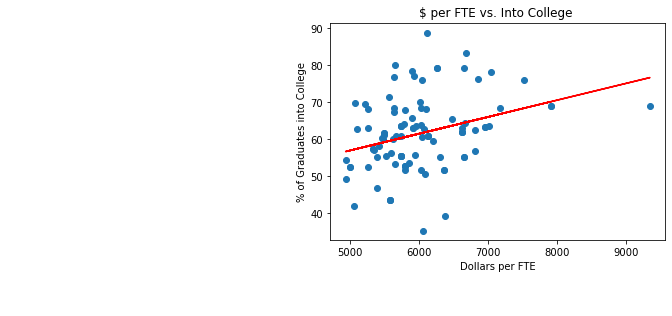

In [76]:
instruction_df = merged_expenditure.loc[(merged_expenditure["Description"] == "Instruction")]
instruction_df.drop_duplicates()
instruction_df

# Northern Hemisphere - Max Temp vs. Latitude
x_values = instruction_df['Dollars per FTE']
y_values = instruction_df['Percent']
plt.scatter(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.xlabel('Dollars per FTE')
plt.ylabel('% of Graduates into College')
plt.title("$ per FTE vs. Into College ")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()
          
